# 2023-01-17 the simplest version of attention

Task: tranlate english to vietnamese

Which word is in your head when you see:
  - `I`? --> `tôi`
  - `know`? --> `biết`
  - `don't`? --> `không`

The idea of creating a model that can query
  - `I` return `tôi`
  - `know` return `biết`
  - `don't` return `không`
  
To let's translate `I don't know` to `Tôi không biết`

### Idea 1
  - We can have a dictionary
  ```
  {"I": "tôi", 'know' : "biết", "don't":"không"}
  
  ```
  - We all know that language is more complex than that. One word can have multiple meaning and the order of word is different.

### Idea 2
  - Attention layer with (query, key, value) as we have discused.

  - every word has one embeeding value. X
  - from X we can generate [(q1, k1, v1), (q2, k2, v2), ..., (qn, kn, vn)] deal to n contexts
  - a tuple (q1, k1, v1) will be
    - q1 = tranform_to_q1(X) = X * Mq_1
    - k1 = tranform_to_k1(X) = X * Mk_1
    - v1 = tranform_to_v1(X) = X * Mv_1
    
  - the attention of `I` to `tôi` on context 1 will be attention(`I`, `tôi`) = `I`.q_1 * `tôi`.k_1
  
  - the attention of `I` to `tôi` on context 2 will be attention(`I`, `tôi`) = `I`.q_2 * `tôi`.k_2
  
  - In this example we only use one context. 
  - Our expectation is that:
    - value of attention(`I`, `tôi`), attention(`know`, `biết`), and attention(`don't`, `không`) will be high.
    - other attentions will be lower.
    
  - We will adjust the value of X_I, X_know, X_don't, X_tôi, X_biết, X_không and Mq_1, Mk_1, Mv_1. Because we only have 1 context, let's remove the index in Mq_1, Mk_1, Mv_1 and rename them into Mq, Mk, Mv.

In [1]:
import torch
from torch import nn
torch.manual_seed(5)

# step 1: inital value

# step 2: attention function

# step 3a: review attention before adjust value

# step 3b: adjust value to get what we expect

# step 3c: review attention after adjust value


In [2]:
# step 1: inital value
ws = dict()
ms = dict()
vocabs = ['I', 'know', "don't", "tôi", "biết", "không"]
n_word = len(vocabs)
for w in vocabs:
    ws[w] = torch.randn(10 ,requires_grad=True)
    
for m in ['q', 'k']: # don't use 'v' now
    ms[m] = torch.randn((10,10) ,requires_grad=True)
parameters = list(ws.values()) + list(ms.values())
for w in vocabs:
    print(f'{w} \t {ws[w]}')

I 	 tensor([-0.4868, -0.6038, -0.5581,  0.6675, -0.1974,  1.9428, -1.4017, -0.7626,
         0.6312, -0.8991], requires_grad=True)
know 	 tensor([-0.5578,  0.6907,  0.2225, -0.6662,  0.6846,  0.5740, -0.5829,  0.7679,
         0.0571, -1.1894], requires_grad=True)
don't 	 tensor([-0.5659, -0.8327,  0.9014,  0.2116,  0.4479, -0.6088,  0.2389,  0.4699,
        -1.9540, -0.5587], requires_grad=True)
tôi 	 tensor([ 0.4295, -2.2643, -0.2017,  1.0677,  0.3246, -0.0684, -0.9959,  1.1563,
        -0.3992,  1.2153], requires_grad=True)
biết 	 tensor([-0.8115, -0.8848, -0.0070, -1.7700, -1.1698, -0.2593,  0.2692,  0.0837,
        -0.5490, -0.0838], requires_grad=True)
không 	 tensor([-0.1387, -0.5289, -0.4919, -0.4646, -0.0588,  1.2624,  1.1935,  1.5696,
        -0.8977, -0.1139], requires_grad=True)


In [3]:
parameters

[tensor([-0.4868, -0.6038, -0.5581,  0.6675, -0.1974,  1.9428, -1.4017, -0.7626,
          0.6312, -0.8991], requires_grad=True),
 tensor([-0.5578,  0.6907,  0.2225, -0.6662,  0.6846,  0.5740, -0.5829,  0.7679,
          0.0571, -1.1894], requires_grad=True),
 tensor([-0.5659, -0.8327,  0.9014,  0.2116,  0.4479, -0.6088,  0.2389,  0.4699,
         -1.9540, -0.5587], requires_grad=True),
 tensor([ 0.4295, -2.2643, -0.2017,  1.0677,  0.3246, -0.0684, -0.9959,  1.1563,
         -0.3992,  1.2153], requires_grad=True),
 tensor([-0.8115, -0.8848, -0.0070, -1.7700, -1.1698, -0.2593,  0.2692,  0.0837,
         -0.5490, -0.0838], requires_grad=True),
 tensor([-0.1387, -0.5289, -0.4919, -0.4646, -0.0588,  1.2624,  1.1935,  1.5696,
         -0.8977, -0.1139], requires_grad=True),
 tensor([[ 0.8417, -0.6211,  1.4462,  0.4473, -0.6523, -2.0344,  1.1931,  1.1670,
           1.1824,  0.5183],
         [ 1.2896,  0.7412,  0.3150, -1.4139,  0.7605, -0.1033, -1.8593,  0.0541,
          -1.7767, -0.4437]

In [4]:
# step 2: attention function
def Q(w): return ws[w] @ ms['q']
def K(w): return ws[w] @ ms['k']
def V(w): return ws[w] @ ms['v']
    
def attention(w1, w2):
    return Q(w1) @ K(w2)

attention('I', 'tôi').item()

-9.358345031738281

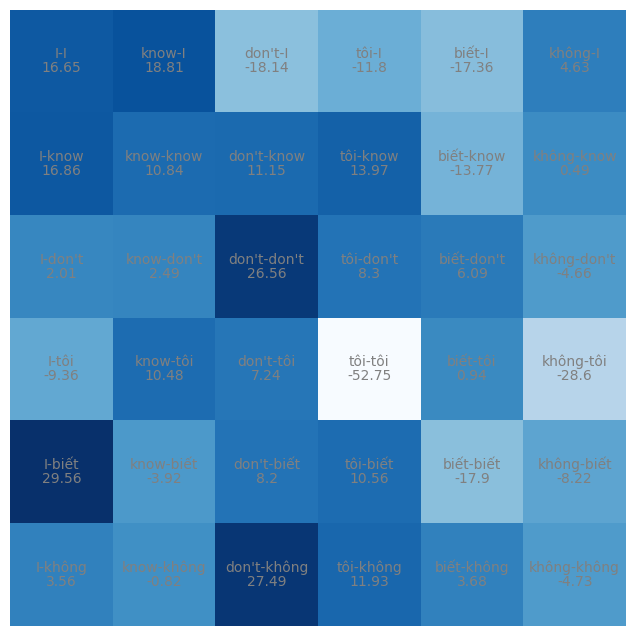

In [5]:
# step 3a: review attention before adjust value
import matplotlib.pyplot as plt
%matplotlib inline

def ploat_heatmap(N):
    plt.figure(figsize=(8,8))
    plt.imshow(N, cmap='Blues')
    for i in range(n_word):
        for j in range(n_word):
            w1, w2 = vocabs[i], vocabs[j]
            chstr = f"{w2}-{w1}"
            plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
            plt.text(j, i, round(N[i,j].item(),2), ha="center", va="top", color='gray')
    plt.axis('off');

N = torch.zeros((n_word, n_word), dtype=torch.float)
for i in range(n_word):
    for j in range(n_word):
        w2, w1 = vocabs[i], vocabs[j]
        N[i,j] = attention(w1, w2).item()
        
ploat_heatmap(N)

In [6]:
attention('I', 'tôi').item(), attention('know', "biết").item(), attention("don't", "không").item()

(-9.358345031738281, -3.9177298545837402, 27.493515014648438)

In [200]:
# step 3b: adjust value to get what we expected.
# - Our expectation is that:
#   - value of attention(`I`, `tôi`), attention(`know`, `biết`), and attention(`don't`, `không`) will be high.
#   - other attentions will be lower.

# let set values of attention(`I`, `tôi`), attention(`know`, `biết`), and attention(`don't`, `không`) are 1
# and others are zero
# for i in range(3):
loss = 0
N = torch.zeros((n_word, n_word), dtype=torch.float)
for i in range(n_word):
    for j in range(n_word):
        w1, w2 = vocabs[i], vocabs[j]
        if (w1, w2) in [('I', "tôi"), ('know', "biết"), ("don't", "không")]:
            loss += (1 - attention(w1, w2))**2
            print(w1, w2)
        else:
            loss += (0 - attention(w1, w2))**2
loss = loss / n_word**2
print(loss.item())
for p in parameters: p.grad = None
loss.backward()
for p in parameters:
    p.data -= p.grad * 0.01
print(attention('I', 'tôi').item(), attention('know', "biết").item(), attention("don't", "không").item())

I tôi
know biết
don't không
0.005097456742078066
1.1241368055343628 0.9796862602233887 0.9893691539764404


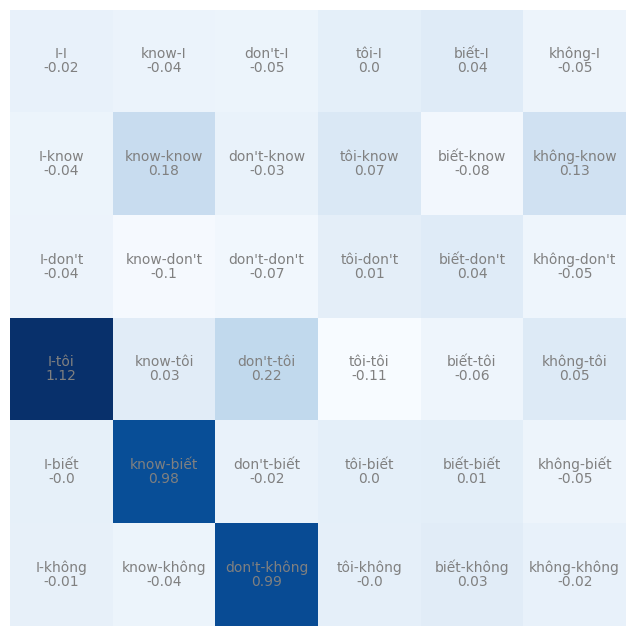

In [201]:
# step 3c: review attention after adjust value
import matplotlib.pyplot as plt
%matplotlib inline

N = torch.zeros((n_word, n_word), dtype=torch.float)
for i in range(n_word):
    for j in range(n_word):
        w2, w1 = vocabs[i], vocabs[j]
        N[i,j] = attention(w1, w2).item()
        
ploat_heatmap(N)

### Convert this file to md

In [202]:
from IPython.core.display import Javascript

In [203]:
%%js
IPython.notebook.kernel.execute('this_notebook = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [204]:
this_notebook

'2023-01-17-the-simplest-version-of-attention.ipynb'

In [205]:
!jupyter nbconvert --to markdown {this_notebook} --output-dir=../_posts

[NbConvertApp] Converting notebook 2023-01-17-the-simplest-version-of-attention.ipynb to markdown
[NbConvertApp] Support files will be in 2023-01-17-the-simplest-version-of-attention_files/
[NbConvertApp] Making directory ../_posts/2023-01-17-the-simplest-version-of-attention_files
[NbConvertApp] Making directory ../_posts/2023-01-17-the-simplest-version-of-attention_files
[NbConvertApp] Writing 16079 bytes to ../_posts/2023-01-17-the-simplest-version-of-attention.md
